In [5]:
import numpy as np
import pickle
import bz2
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import TruncatedSVD


In [6]:
# load training data
Xtr_loadpath = 'Xtr.csv'
Xts_loadpath = 'Xts.csv'
ytr_loadpath = 'ytr.csv'


Xtr = np.loadtxt(Xtr_loadpath, delimiter=",")
Xts = np.loadtxt(Xts_loadpath, delimiter=",")
ytr = np.loadtxt(ytr_loadpath, delimiter=",")

num_features = Xtr.shape[1]
num_samples = Xtr.shape[0]
print(num_features)
print(num_samples)



16
10000


In [7]:
from scipy.stats import skew
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer


scaler=StandardScaler()
xmean=np.mean(Xtr,axis=0)
xstd=np.std(Xtr,axis=0)
Xtr_standardized = (Xtr-xmean[None,:])/xstd[None,:]
Xts_standardized = (Xts-xmean[None,:])/xstd[None,:]

# save the standardized training data
Xtr_savepath = 'Xtr_sklearn.csv'
Xts_savepath = 'Xts_sklearn.csv'
yts_hat_savepath = 'yts_hat_sklearn.csv'

np.savetxt(Xtr_savepath, Xtr_standardized, delimiter=",")
np.savetxt(Xts_savepath, Xts_standardized, delimiter=",")

X_train, X_test, y_train, y_test = train_test_split(Xtr_standardized, ytr, test_size=0.25, shuffle=True)

In [8]:
from sklearn import linear_model, preprocessing, svm
svc = svm.LinearSVC(loss='hinge', C=50, multi_class='crammer_singer')
C_test = [1,10,20,30,40,50,100,200,300,400]
num_folds=5
import sklearn.model_selection
from sklearn.model_selection import GridSearchCV
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
param_grid = {'C' : C_test, 'multi_class' : ['crammer_singer'],'loss' : ['hinge']}
svc_c = svm.LinearSVC(C=10000, multi_class='crammer_singer',max_iter=100000,loss='squared_hinge')
clf = GridSearchCV(svc_c, param_grid = param_grid, cv = kf, verbose=0,n_jobs=-1)
clf.fit(X_train,y_train)

# TODO:  Print the best parameter and score of the classifier
print("Best parameter: " + str(clf.best_params_))
print("Best score: " + str(clf.best_score_))

svc = svm.LinearSVC(penalty='None', C=clf.best_params_['C'], multi_class='crammer_singer',max_iter=10000,loss='squared_hinge',dual=False)
svc.fit(X_train,y_train)
yhat = svc.predict(X_test)
acc = np.mean(yhat== y_test)
print('Accuracy on test data = {0:f}'.format(acc))

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Best parameter: {'C': 300, 'loss': 'hinge', 'multi_class': 'crammer_singer'}
Best score: 0.7778666666666666
Accuracy on test data = 0.792400


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [9]:
from sklearn import linear_model, preprocessing, svm
svc = svm.LinearSVC(loss='hinge', C=50, multi_class='ovr')
C_test = [1,10,20,30,40,50,100,200,300,400]
num_folds=5
import sklearn.model_selection
from sklearn.model_selection import GridSearchCV
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
param_grid = {'C' : C_test, 'multi_class' : ['ovr'],'loss' : ['hinge']}
svc_c = svm.LinearSVC(C=10000, multi_class='ovr',max_iter=100000,loss='squared_hinge')
clf = GridSearchCV(svc_c, param_grid = param_grid, cv = kf, verbose=0,n_jobs=-1)
clf.fit(X_train,y_train)

# TODO:  Print the best parameter and score of the classifier
print("Best parameter: " + str(clf.best_params_))
print("Best score: " + str(clf.best_score_))

svc = svm.LinearSVC(C=clf.best_params_['C'], multi_class='ovr',max_iter=10000,loss='squared_hinge',dual=False)
svc.fit(X_train,y_train)
yhat = svc.predict(X_test)
acc = np.mean(yhat== y_test)
print('Accuracy on test data = {0:f}'.format(acc))

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Best parameter: {'C': 200, 'loss': 'hinge', 'multi_class': 'ovr'}
Best score: 0.5941333333333334
Accuracy on test data = 0.700800


In [10]:
svc_1 = svm.LinearSVC(penalty='l1', C=50, multi_class='crammer_singer',max_iter=100000,loss='squared_hinge',dual=False)
C_test = [1,10,20,30,40,50,100,200,300,400]
kf = KFold(n_splits=5, shuffle=True, random_state=42)
param_grid = {'C' : C_test, 'multi_class' : ['crammer_singer'],'loss' : ['hinge']}
svc_c = svm.LinearSVC(C=10000, multi_class='crammer_singer',max_iter=100000,loss='squared_hinge')
clf = GridSearchCV(svc_c, param_grid = param_grid, cv = kf, verbose=0,n_jobs=-1)
clf.fit(X_train,y_train)
svc_c = svm.LinearSVC(C=clf.best_params_['C'], multi_class='crammer_singer',max_iter=100000,loss='squared_hinge')
svc_c.fit(X_train,y_train)
yhat = svc_c.predict(X_test)
yhat = np.mean(yhat== y_test)
print('Accuracy on test data = {0:f}'.format(yhat))
rsq_cv =clf.cv_results_['mean_test_score']
maxacc=clf.best_score_
maxalpha=clf.best_params_['C']


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Accuracy on test data = 0.790000


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Accuracy on test data = 0.789200


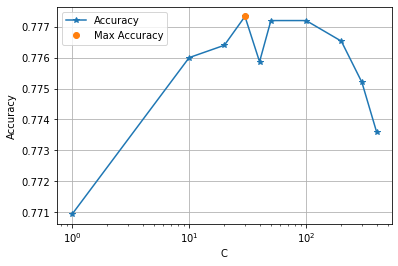

In [11]:
fig,ax=plt.subplots()

plt.plot(C_test,rsq_cv,'-*',label='Accuracy')
#plt.scatter(C_values,rsq_cv,color='r')

plt.plot(maxalpha,maxacc,'o',label='Max Accuracy')
plt.plot()
#plt.xscale("log")
plt.ylabel('Accuracy')
plt.xlabel('C')
plt.grid()
plt.legend()
plt.xscale('log')
plt.savefig('Figures/L1SVCgridsearch.pdf')
svc_c = svm.LinearSVC(C=maxalpha, multi_class='crammer_singer',max_iter=100000,loss='squared_hinge')
svc_c.fit(X_train,y_train)
yhat = svc_c.predict(X_test)
acc = np.mean(yhat == y_test)
print("Accuracy on test data = %f" % acc)


In [12]:
svc_1 = svm.LinearSVC(penalty='l2', C=50, multi_class='crammer_singer',max_iter=100000,loss='squared_hinge',dual=False)
C_test = [1,10,20,30,40,50,100,200,300,400]
kf = KFold(n_splits=5, shuffle=True, random_state=42)
param_grid = {'C' : C_test, 'multi_class' : ['crammer_singer'],'loss' : ['hinge']}
svc_c = svm.LinearSVC(C=10000, multi_class='crammer_singer',max_iter=100000,loss='squared_hinge')
clf = GridSearchCV(svc_c, param_grid = param_grid, cv = kf, verbose=0,n_jobs=-1)
clf.fit(X_train,y_train)
svc_c = svm.LinearSVC(C=clf.best_params_['C'], multi_class='crammer_singer',max_iter=100000,loss='squared_hinge')
svc_c.fit(X_train,y_train)
yhat = svc_c.predict(X_test)
yhat = np.mean(yhat== y_test)
print('Accuracy on test data = {0:f}'.format(yhat))
rsq_cv =clf.cv_results_['mean_test_score']
maxacc=clf.best_score_
maxalpha=clf.best_params_['C']


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Accuracy on test data = 0.789200


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Accuracy on test data = 0.787600


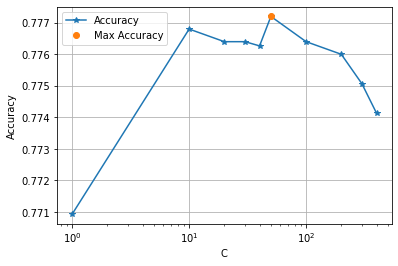

In [13]:
fig,ax=plt.subplots()

plt.plot(C_test,rsq_cv,'-*',label='Accuracy')
#plt.scatter(C_values,rsq_cv,color='r')

plt.plot(maxalpha,maxacc,'o',label='Max Accuracy')
plt.plot()
#plt.xscale("log")
plt.ylabel('Accuracy')
plt.xlabel('C')
plt.xscale('log')
plt.grid()
plt.legend()
plt.savefig('Figures/L2SVCgridsearch.pdf')

svc_c = svm.LinearSVC(C=maxalpha, multi_class='crammer_singer',max_iter=100000,loss='squared_hinge',verbose=0)
svc_c.fit(X_train,y_train)
yhat = svc_c.predict(X_test)
acc_test = np.mean(yhat == y_test)
print("Accuracy on test data = %f" % acc_test)
